# New minimum VPD experiment

Constant VPD simulation ($VPD=0.05$ kPa): ```/glade/scratch/bbuchovecky/archive/minCnstVPDforPhoto_PI_SOM/<gcomp>/hist/```

Control experiment: ```/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0000_PI_SOM/<gcomp>/proc/tseries/```

# Setup

In [2]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import pickle as pkl

import cartopy
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.path as mpath

import matplotlib.gridspec as gs

import cmocean.cm as cmo

In [3]:
## Some magic to automatically reload my functions before running a new cell
%load_ext autoreload
%autoreload 1
%aimport climate_data_science_functions

import climate_data_science_functions as cds

## Figure settings

In [4]:
## Adjust dpi
mpl.rcParams['figure.dpi'] = 120

## Assign figure output format
# %config InlineBackend.figure_formats = ['pdf']  ## vector, transparent background -> best for publication
%config InlineBackend.figure_formats = ['png']  ## raster, transparent background -> best for publication of large, dense figures
# %config InlineBackend.figure_formats = ['jpg']  ## raster, white background -> best for adding to notes

# Dictionaries and constants

In [5]:
case = {
    'cst':'minCnstVPDforPhoto_PI_SOM',
    'ctl':'COUP0000_PI_SOM'
}

path = {
    'cst': '/glade/scratch/bbuchovecky/archive/minCnstVPDforPhoto_PI_SOM/',
    'ctl': '/glade/scratch/bbuchovecky/archive/COUP0000_PI_SOM/'
}

# with open('/glade/u/home/bbuchovecky/cesm_analysis_dicts/cesm2_masks.pkl', 'rb') as handle:
#     masks = pkl.load(handle)

scomp = {
    'atm': 'cam',
    'lnd': 'clm2'
}

variable = {
    'atm':{
        'trefht',   # near-surface air temperature [degC]
        'prect',  # total precipitation rate [mm/day]
        # 'fsns',   # net solar flux at surface, +down [W/m2]
        # 'fsds',   # downwelling solar flux at surface, +down [W/m2]
        # 'fsus',   # upwelling solar flux at surface, +up [W/m2]
        # 'flns',   # net longwave flux at surface, +down [W/m2]
        # 'flds',   # downwelling longwave flux at surface, +down [W/m2]
        # 'flus',   # upwelling longwave flux at surface, +up [W/m2]
        'lhflx',  # latent heat flux at surface, +up [W/m2]
        # 'et',     # evapotranspiration flux at surface [mm/day]
        # 'shflx',  # sensible heat flux at surface, +up [W/m2]
        # 'nrad',   # net radiation at surface, +down [W/m2]
        # 'stor'    # heat uptake/storage of surface, +up [W/m2]
    },
    'lnd':{
        'gssunln',     # sunlit leaf stomatal conductance at local noon [umol/m2/s]
        'fctr',        # canopy transpiration [W/m2]
        # 'qvegt',       # canopy transpiration [mm/m2]
        'btran2',      # root zone soil wetness factor [1]
        'btranmn',     # daily minimum of transpiration beta factor [1]
        'tlai',        # total projected leaf area index [m2/m2]
        'gpp',         # gross primary production [gC/m2/s]
        'tsa',         # 2m air temperature [K]
        # 'tranlai',     # canopy transpiration per LAI (FCTR/TLAI)
        'h2osoi',      # volumetric soil water [mm3/mm3]
        'soilliq',     # soil liquid water [kg/m2]
        'totsoilliq',  # vertically summed soil liquid water [kg/m2	]
        'npp_nuptake', # total C used by N uptake in FUN [gC/m2/s]
        'nuptake',     # total N uptake of FUN [gN/m2/s]
    }
}

calc_variable = ['prect']

unit = {
    'gssunln':'[$\mu$mol H$_2$O m$^{-2}$ s$^{-1}$]',
    'fctr':'[W m$^{-2}$]',
    'btran2':'[1]',
    'btranmn':'[1]',
    'tlai':'[m$^2$ m$^{-2}$]',
    'gpp':'[gC m$^{-2}$ s$^{-1}$]',
    'tsa':'[K]',
    'tranlai':'[(W m$^{-2}$) (m$^2$ m$^{-2}$)$^{-1}$]'
}

full_name = {
    'gssunln':'sunlit leaf stomatal conductance at local noon',
    'tlai':'total projected leaf area index',
    'gpp':'gross primary production',
    'btranmn':'daily minimum of transpiration beta factor',
    'fctr':'canopy transpiration',
    'npp_nuptake':'total C used by N uptake in FUN',
    'tsa':'2m air temperature',
    'soilliq':'soil liquid water'
}

subplot_kws = {'projection': ccrs.Robinson()}
cbar_kwargs = {'orientation':'vertical', 'fraction':0.025}

tslice = slice('0049-01','0099-12')

# Load output

In [6]:
vardict = {}
verbose = False

for cc in case.keys():
    if verbose: print(cc)
    vardict[cc] = {}
    for gc in variable.keys():
        if verbose: print('  '+gc)
        vardict[cc][gc] = {}
        for vv in variable[gc]:
            if verbose: print('    '+vv)
            if vv in calc_variable: vv = 'calculated_'+vv.upper()
            else: vv = vv.upper()
            vardict[cc][gc][vv.lower()] = xr.open_dataset(path[cc]+gc+'/proc/tseries/'+case[cc]+'.'+scomp[gc]+'.h0.timeseries.'+vv+'.nc')[vv].sel(time=tslice)
            if verbose: print('      '+path[cc]+gc+'/proc/tseries/'+case[cc]+'.'+scomp[gc]+'.h0.timeseries.'+vv+'.nc')

In [7]:
# for cc in case.keys():
#     print(cc)
#     for gc in variable.keys():
#         print('  '+gc)
#         for vv in variable[gc]:
#             if vv in calc_variable: vv = 'calculated_'+vv
#             print('    '+vv+' --- '+str(vardict[cc][gc][vv.lower()].sizes))

# Time-average maps

Text(0.5, 1.0, 'GSSUNLN (sunlit leaf stomatal conductance at local noon)')

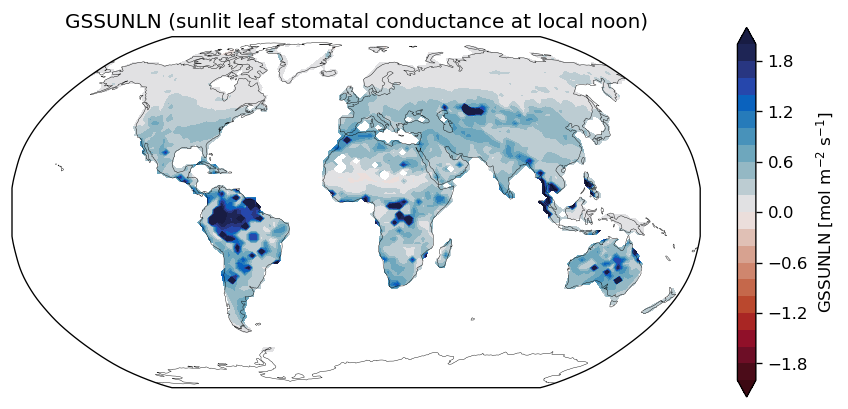

In [44]:
vv = 'gssunln'
gc = 'lnd'

levels = np.arange(-2,2.1,0.2)
cmap = cmo.balance_r
units = 'mol m$^{-2}$ s$^{-1}$'

da = vardict['cst'][gc][vv] - vardict['ctl'][gc][vv]
da = da.mean(dim='time')
da = da/1e6

fig,ax = plt.subplots(figsize=(8,4), subplot_kw=subplot_kws)
cf = cds.cyclic_contourf(ax, da, levels=levels, cmap=cmap, extend='both', transform=ccrs.PlateCarree())
ax.coastlines(lw=0.25)
ax.set_extent([-181, 181, -90, 90], crs=ccrs.PlateCarree())
cb = fig.colorbar(cf, ax=ax, fraction=0.025, label=vv.upper()+' ['+units+']')
ax.set_title(vv.upper()+' ('+full_name[vv]+')')

Text(0.5, 1.0, 'TLAI (total projected leaf area index)')

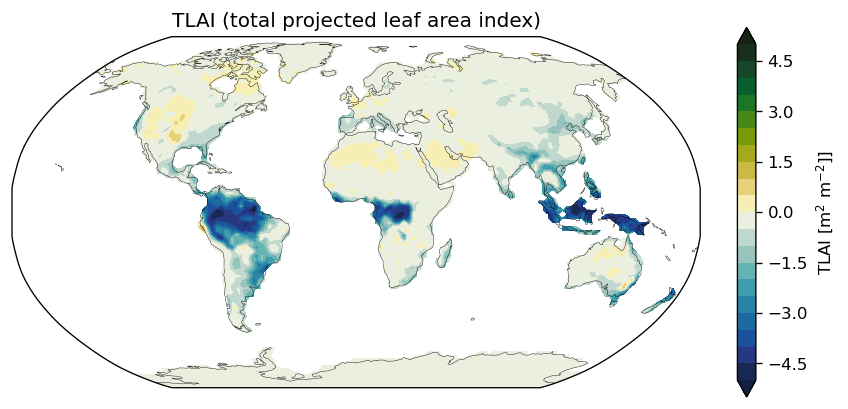

In [45]:
vv = 'tlai'
gc = 'lnd'

levels = np.arange(-5,5.1,0.5)
cmap = cmo.delta
units = 'm$^2$ m$^{-2}$]'

da = vardict['cst'][gc][vv] - vardict['ctl'][gc][vv]
da = da.mean(dim='time')

fig,ax = plt.subplots(figsize=(8,4), subplot_kw=subplot_kws)
cf = cds.cyclic_contourf(ax, da, levels=levels, cmap=cmap, extend='both', transform=ccrs.PlateCarree())
ax.coastlines(lw=0.25)
ax.set_extent([-181, 181, -90, 90], crs=ccrs.PlateCarree())
cb = fig.colorbar(cf, ax=ax, fraction=0.025, label=vv.upper()+' ['+units+']')
ax.set_title(vv.upper()+' ('+full_name[vv]+')')

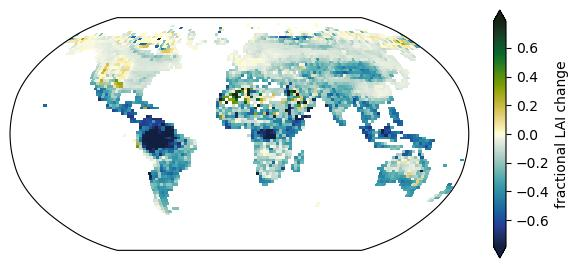

In [42]:
vv = 'tlai'
gc = 'lnd'

((vardict['cst'][gc][vv]-vardict['ctl'][gc][vv])/(vardict['cst'][gc][vv]+vardict['ctl'][gc][vv])).mean(dim='time').plot(cmap=cmo.delta,
                                                                                                                        # vmin=-100, vmax=100,
                                                                                                                        robust=True, extend='both',
                                                                                                                        cbar_kwargs={**cbar_kwargs, **{'label': 'fractional LAI change'}},
                                                                                                                        subplot_kws=subplot_kws,
                                                                                                                        transform=ccrs.PlateCarree())

Text(0.5, 1.0, 'GPP (gross primary production)')

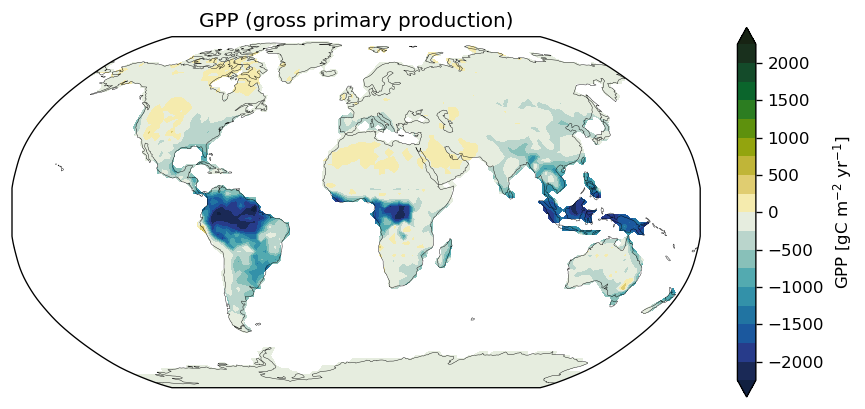

In [11]:
vv = 'gpp'
gc = 'lnd'

levels = np.arange(-2250,2251,250)
cmap = cmo.delta
units = 'gC m$^{-2}$ yr$^{-1}$'

da = vardict['cst'][gc][vv] - vardict['ctl'][gc][vv]
da = da.mean(dim='time')
da = da*31536000

fig,ax = plt.subplots(figsize=(8,4), subplot_kw=subplot_kws)
cf = cds.cyclic_contourf(ax, da, levels=levels, cmap=cmap, extend='both', transform=ccrs.PlateCarree())
ax.coastlines(lw=0.25)
ax.set_extent([-181, 181, -90, 90], crs=ccrs.PlateCarree())
cb = fig.colorbar(cf, ax=ax, fraction=0.025, label=vv.upper()+' ['+units+']')
ax.set_title(vv.upper()+' ('+full_name[vv]+')')

# ((vardict['cst'][gc][vv]-vardict['ctl'][gc][vv]).mean(dim='time')*31536000).plot(cmap=cmo.delta,
#                                                                                  vmin=-2500, vmax=2500, extend='both',
#                                                                                  cbar_kwargs={**cbar_kwargs,**{'label':'GPP [gC m$^{-2}$ yr$^{-1}$]'}},
#                                                                                  subplot_kws=subplot_kws,
#                                                                                  transform=ccrs.PlateCarree())

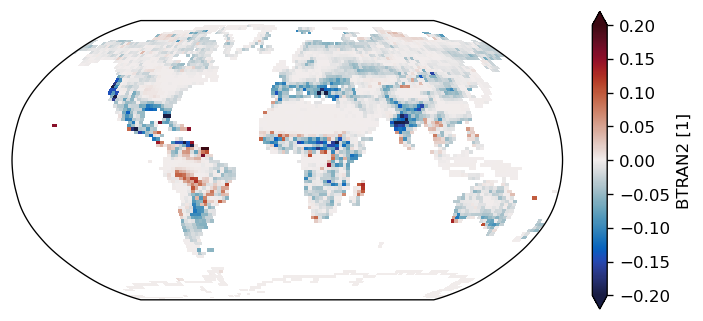

In [13]:
vv = 'btran2'
gc = 'lnd'

# levels = np.arange(-0.2,0.201,0.05)
# cmap = cmo.delta
# units = '1'

# da = vardict['cst'][gc][vv] - vardict['ctl'][gc][vv]
# da = da.mean(dim='time')
# da = da

# fig,ax = plt.subplots(figsize=(8,4), subplot_kw=subplot_kws)
# cf = cds.cyclic_contourf(ax, da, levels=levels, cmap=cmap, extend='both', transform=ccrs.PlateCarree())
# ax.coastlines(lw=0.25)
# ax.set_extent([-181, 181, -90, 90], crs=ccrs.PlateCarree())
# cb = fig.colorbar(cf, ax=ax, fraction=0.025, label=vv.upper()+' ['+units+']')
# ax.set_title(vv.upper()+' ('+full_name[vv]+')')

(vardict['cst'][gc][vv]-vardict['ctl'][gc][vv]).mean(dim='time').plot(cmap=cmo.balance,
                                                                      vmin=-0.2, vmax=0.2, extend='both',
                                                                      cbar_kwargs={**cbar_kwargs,**{'label':vv.upper()+' [1]'}},
                                                                      subplot_kws=subplot_kws,
                                                                      transform=ccrs.PlateCarree())

Text(0.5, 1.0, 'BTRANMN (daily minimum of transpiration beta factor)')

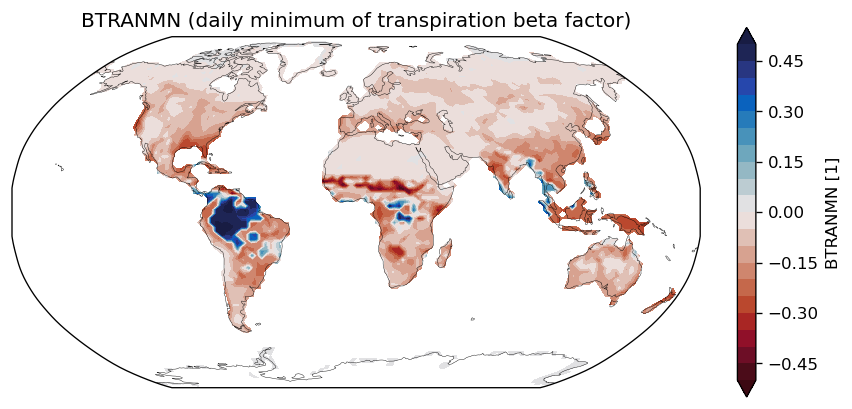

In [16]:
vv = 'btranmn'
gc = 'lnd'

levels = np.arange(-0.5,0.501,0.05)
cmap = cmo.balance_r
units = '1'

da = vardict['cst'][gc][vv] - vardict['ctl'][gc][vv]
da = da.mean(dim='time')
da = da

fig,ax = plt.subplots(figsize=(8,4), subplot_kw=subplot_kws)
cf = cds.cyclic_contourf(ax, da, levels=levels, cmap=cmap, extend='both', transform=ccrs.PlateCarree())
ax.coastlines(lw=0.25)
ax.set_extent([-181, 181, -90, 90], crs=ccrs.PlateCarree())
cb = fig.colorbar(cf, ax=ax, fraction=0.025, label=vv.upper()+' ['+units+']')
ax.set_title(vv.upper()+' ('+full_name[vv]+')')

# (vardict['cst'][gc][vv]-vardict['ctl'][gc][vv]).mean(dim='time').plot(cmap=cmo.balance,
#                                                                        vmin=-0.5, vmax=0.5, extend='both',
#                                                                        cbar_kwargs={**cbar_kwargs,**{'label':vv.upper()+' [1]'}},
#                                                                        subplot_kws=subplot_kws,
#                                                                        transform=ccrs.PlateCarree())

Text(0.5, 1.0, 'FCTR (canopy transpiration)')

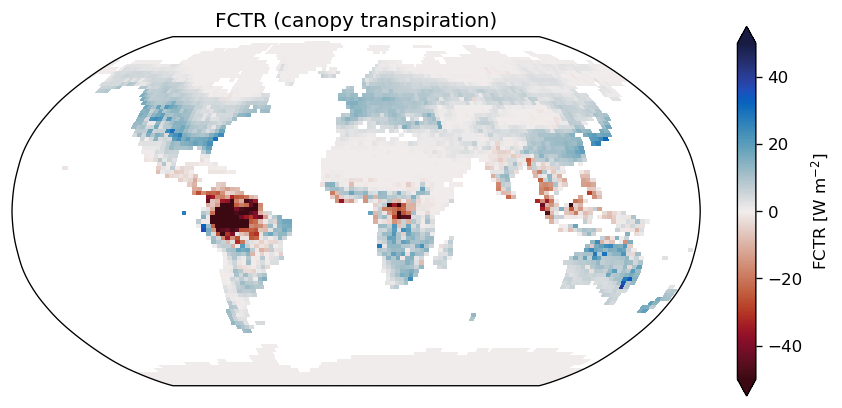

In [29]:
vv = 'fctr'
gc = 'lnd'

# levels = np.arange(-50,51,5)
# cmap = cmo.balance_r
# units = 'W m$^{-2}$]'

# da = (vardict['cst'][gc][vv] - vardict['ctl'][gc][vv]).mean(dim='time')
# # da = da.mean(dim='time')
# # da = da.isel(time=10)

# fig,ax = plt.subplots(figsize=(8,4), subplot_kw=subplot_kws)
# cf = cds.cyclic_contourf(ax, da, levels=levels, cmap=cmap, extend='both', transform=ccrs.PlateCarree())
# ax.coastlines(lw=0.25)
# ax.set_extent([-181, 181, -90, 90], crs=ccrs.PlateCarree())
# cb = fig.colorbar(cf, ax=ax, fraction=0.025, label=vv.upper()+' ['+units+']')
# ax.set_title(vv.upper()+' ('+full_name[vv]+')')

(vardict['cst'][gc][vv]-vardict['ctl'][gc][vv]).mean(dim='time').plot(cmap=cmo.balance_r,
                                                                      vmin=-50, vmax=50, extend='both',
                                                                      cbar_kwargs={**cbar_kwargs,**{'label':vv.upper()+' [W m$^{-2}$]'}},
                                                                      subplot_kws=subplot_kws,
                                                                      transform=ccrs.PlateCarree(),
                                                                      figsize=(8,4))
plt.title(vv.upper()+' ('+full_name[vv]+')')

Text(0.5, 1.0, 'TSA (2m air temperature)')

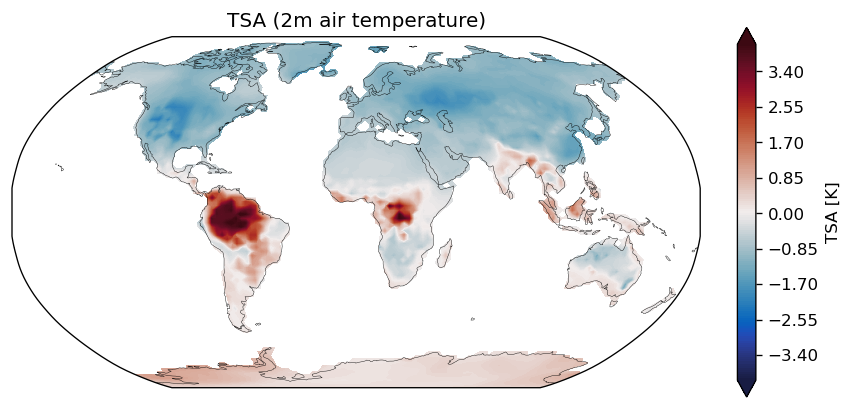

In [31]:
vv = 'tsa'
gc = 'lnd'

levels = np.arange(-4,4.1,0.05)
cmap = cmo.balance
units = 'K'

da = (vardict['cst'][gc][vv] - vardict['ctl'][gc][vv]).mean(dim='time')
# da = da.mean(dim='time')
# da = da.isel(time=10)

fig,ax = plt.subplots(figsize=(8,4), subplot_kw=subplot_kws)
cf = cds.cyclic_contourf(ax, da, levels=levels, cmap=cmap, extend='both', transform=ccrs.PlateCarree())
ax.coastlines(lw=0.25)
ax.set_extent([-181, 181, -90, 90], crs=ccrs.PlateCarree())
cb = fig.colorbar(cf, ax=ax, fraction=0.025, label=vv.upper()+' ['+units+']')
ax.set_title(vv.upper()+' ('+full_name[vv]+')')

# (vardict['cst'][gc][vv]-vardict['ctl'][gc][vv]).mean(dim='time').plot(cmap=cmo.balance,
#                                                                       vmin=-4, vmax=4, extend='both',
#                                                                       cbar_kwargs={**cbar_kwargs, **{'label':vv.upper()+' [K]'}},
#                                                                       subplot_kws=subplot_kws,
#                                                                       transform=ccrs.PlateCarree())

Text(0.5, 1.0, 'FCTR / TLAI (canopy transpiration per unit LAI)')

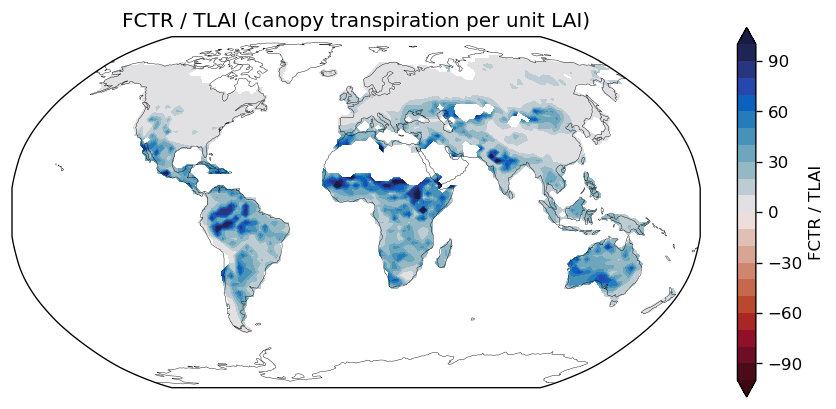

In [33]:
var1 = 'fctr'
var2 = 'tlai'
gc = 'lnd'
threshlai = 0.05

levels = np.arange(-100,101,10)
cmap = cmo.balance_r
units = 'K'

da = vardict['cst'][gc][var1] / vardict['cst'][gc][var2].where(vardict['cst'][gc][var2]>threshlai)
da = da - (vardict['ctl'][gc][var1] / vardict['ctl'][gc][var2].where(vardict['ctl'][gc][var2]>threshlai))
da = da.mean(dim='time')

fig,ax = plt.subplots(figsize=(8,4), subplot_kw=subplot_kws)
cf = cds.cyclic_contourf(ax, da, levels=levels, cmap=cmap, extend='both', transform=ccrs.PlateCarree())
ax.coastlines(lw=0.25)
ax.set_extent([-181, 181, -90, 90], crs=ccrs.PlateCarree())
cb = fig.colorbar(cf, ax=ax, fraction=0.025, label='FCTR / TLAI')
ax.set_title('FCTR / TLAI (canopy transpiration per unit LAI)')


# ((vardict['cst'][gc][var1]/vardict['cst'][gc][var2].where(vardict['cst'][gc][var2]>threshlai))
#  -(vardict['ctl'][gc][var1]/vardict['ctl'][gc][var2].where(vardict['ctl'][gc][var2]>threshlai))).mean(dim='time').plot(cmap=cmo.balance_r,
#                                                                                                            vmin=-100, vmax=100, extend='both',
#                                                                                                            cbar_kwargs={**cbar_kwargs, **{'label': 'FCTR / LAI'}},
#                                                                                                            subplot_kws=subplot_kws,
#                                                                                                            transform=ccrs.PlateCarree())

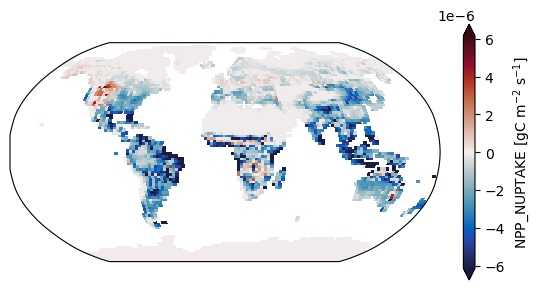

In [20]:
vv = 'npp_nuptake'
gc = 'lnd'
(vardict['cst'][gc][vv]-vardict['ctl'][gc][vv]).mean(dim='time').plot(cmap=cmo.balance,
                                                                      robust=True, extend='both',
                                                                      cbar_kwargs={**cbar_kwargs,**{'label':vv.upper()+' [gC m$^{-2}$ s$^{-1}$]'}},
                                                                      subplot_kws=subplot_kws,
                                                                      transform=ccrs.PlateCarree())

Text(0.5, 1.0, 'Average over first 10 years')

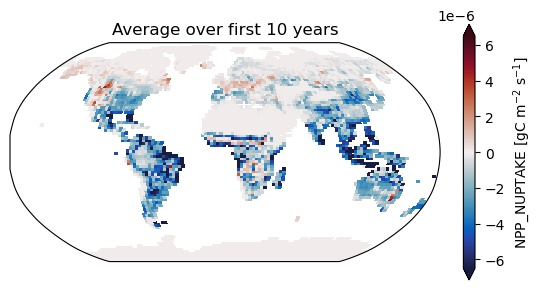

In [127]:
vv = 'npp_nuptake'
gc = 'lnd'
(vardict['cst'][gc][vv]-vardict['ctl'][gc][vv]).sel(time=slice('004901','005912')).mean(dim='time').plot(cmap=cmo.balance,
                                                                      robust=True, extend='both',
                                                                      cbar_kwargs={**cbar_kwargs,**{'label':vv.upper()+' [gC m$^{-2}$ s$^{-1}$]'}},
                                                                      subplot_kws=subplot_kws,
                                                                      transform=ccrs.PlateCarree())
plt.title('Average over first 10 years')

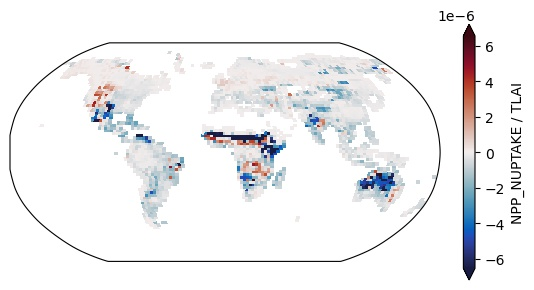

In [146]:
var1 = 'npp_nuptake'
var2 = 'tlai'
gc = 'lnd'
threshlai = 0.05

((vardict['cst'][gc][var1]/vardict['cst'][gc][var2].where(vardict['cst'][gc][var2]>threshlai))
 -(vardict['ctl'][gc][var1]/vardict['ctl'][gc][var2].where(vardict['ctl'][gc][var2]>threshlai))).mean(dim='time').plot(cmap=cmo.balance,
                                                                                                           robust=True,
                                                                                                           extend='both',
                                                                                                           cbar_kwargs={**cbar_kwargs, **{'label': 'NPP_NUPTAKE / TLAI'}},
                                                                                                           subplot_kws=subplot_kws,
                                                                                                           transform=ccrs.PlateCarree())

Text(0.5, 1.0, 'Average over first 10 years')

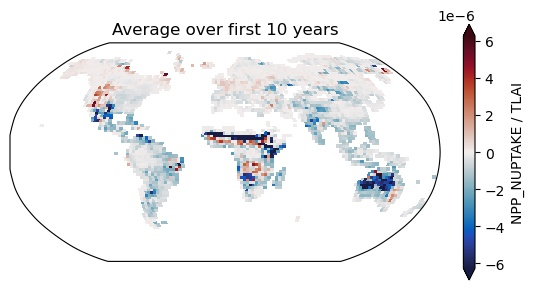

In [142]:
var1 = 'npp_nuptake'
var2 = 'tlai'
gc = 'lnd'
threshlai = 0.05

((vardict['cst'][gc][var1]/vardict['cst'][gc][var2].where(vardict['cst'][gc][var2]>threshlai))
 -(vardict['ctl'][gc][var1]/vardict['ctl'][gc][var2].where(vardict['ctl'][gc][var2]>threshlai))).sel(time=slice('004901','005912')).mean(dim='time').plot(cmap=cmo.balance,
                                                                                                           robust=True,
                                                                                                           extend='both',
                                                                                                           cbar_kwargs={**cbar_kwargs, **{'label': 'NPP_NUPTAKE / TLAI'}},
                                                                                                           subplot_kws=subplot_kws,
                                                                                                           transform=ccrs.PlateCarree())
plt.title('Average over first 10 years')

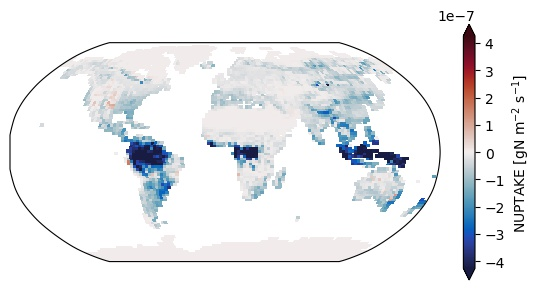

In [21]:
vv = 'nuptake'
gc = 'lnd'
(vardict['cst'][gc][vv]-vardict['ctl'][gc][vv]).mean(dim='time').plot(cmap=cmo.balance,
                                                                      robust=True, extend='both',
                                                                      cbar_kwargs={**cbar_kwargs,**{'label':vv.upper()+' [gN m$^{-2}$ s$^{-1}$]'}},
                                                                      subplot_kws=subplot_kws,
                                                                      transform=ccrs.PlateCarree())

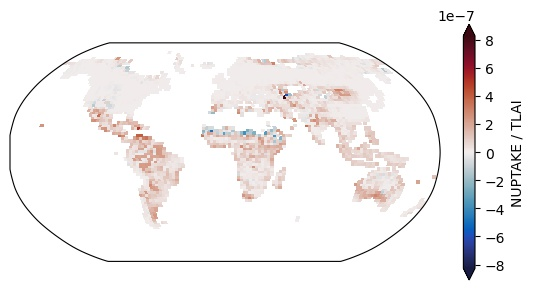

In [144]:
var1 = 'nuptake'
var2 = 'tlai'
gc = 'lnd'
threshlai = 0.05

((vardict['cst'][gc][var1]/vardict['cst'][gc][var2].where(vardict['cst'][gc][var2]>threshlai))
 -(vardict['ctl'][gc][var1]/vardict['ctl'][gc][var2].where(vardict['ctl'][gc][var2]>threshlai))).mean(dim='time').plot(cmap=cmo.balance,
                                                                                                           # robust=True,
                                                                                                           extend='both',
                                                                                                           cbar_kwargs={**cbar_kwargs, **{'label': 'NUPTAKE / TLAI'}},
                                                                                                           subplot_kws=subplot_kws,
                                                                                                           transform=ccrs.PlateCarree())

ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

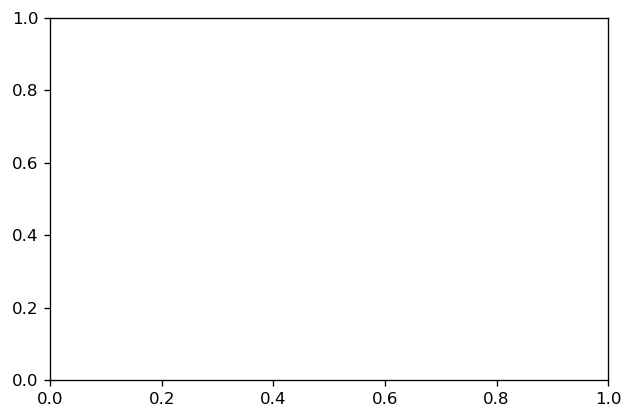

In [27]:
vv = 'h2osoi'
gc = 'lnd'
(vardict['cst'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi')
 -vardict['ctl'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi')).mean(dim='time').plot(cmap=cmo.balance_r,
                                                                                         # vmin=-50, vmax=50,
                                                                                         robust=True, extend='both',
                                                                                         cbar_kwargs={**cbar_kwargs, **{'label': 'top 3m H2OSOI [mm$^3$ mm$^{-3}$]'}},
                                                                                         subplot_kws=subplot_kws,
                                                                                         transform=ccrs.PlateCarree())

ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

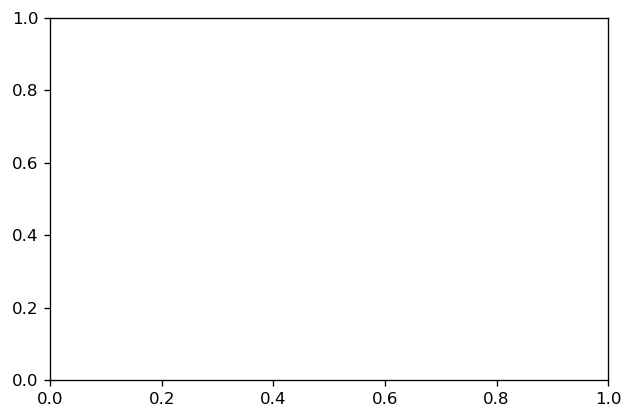

In [26]:
vv = 'soilliq'
gc = 'lnd'

# levels = np.arange(-70,71,10)
# cmap = cmo.balance_r
# units = 'kg m$^{-2}$'

# da = vardict['cst'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi') - vardict['ctl'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi')
# da = da.where(~np.isnan(vardict['cst'][gc][vv]).sel(levsoi=slice(0,3)).sum(dim='levsoi')).mean(dim='time')

# fig,ax = plt.subplots(figsize=(8,4), subplot_kw=subplot_kws)
# cf = cds.cyclic_contourf(ax, da, levels=levels, cmap=cmap, extend='both', transform=ccrs.PlateCarree())
# ax.coastlines(lw=0.25)
# ax.set_extent([-181, 181, -90, 90], crs=ccrs.PlateCarree())
# cb = fig.colorbar(cf, ax=ax, fraction=0.025, label=vv.upper()+' ['+units+']')
# ax.set_title(vv.upper()+' ('+full_name[vv]+')')

(vardict['cst'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi')
 -vardict['ctl'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi')).mean(dim='time').plot(cmap=cmo.balance_r,
                                                                                         robust=True, extend='both',
                                                                                         cbar_kwargs={**cbar_kwargs, **{'label': 'top 3m SOILLIQ [kg m$^{-2}$]'}},
                                                                                         subplot_kws=subplot_kws,
                                                                                         transform=ccrs.PlateCarree())
plt.title(vv.upper()+' (top 3m '+full_name[vv]+')')

# Timeseries

In [7]:
wght = np.cos(np.deg2rad(vardict['cst']['lnd']['tlai'].lat))

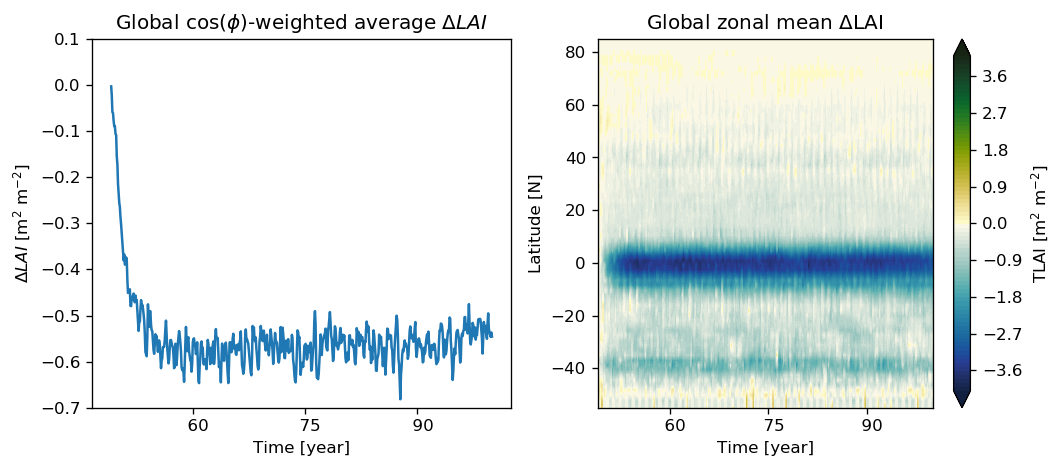

In [28]:
vv = 'tlai'
gc = 'lnd'

fig,axes = plt.subplots(1,2,figsize=(9,4))
ax = axes.ravel()

(cds.coslat_area_avg(vardict['cst']['lnd']['tlai']) - cds.coslat_area_avg(vardict['ctl']['lnd']['tlai'])).plot(ax=ax[0])
ax[0].set_title('Global cos($\phi$)-weighted average $\Delta LAI$')
ax[0].set_ylabel('$\Delta LAI$ [m$^2$ m$^{-2}$]')
ax[0].set_xlabel('Time [year]')
ax[0].set_ylim(-0.7, 0.1)

(vardict['cst']['lnd']['tlai'].mean(dim='lon')*wght
 -vardict['ctl']['lnd']['tlai'].mean(dim='lon')*wght).transpose().plot.contourf(levels=101,
                                                                                cmap=cmo.delta,
                                                                                ax=ax[1],
                                                                                extend='both',
                                                                                cbar_kwargs={'label': 'TLAI [m$^{2}$ m$^{-2}$]'})
ax[1].set_ylim(-55,85)
ax[1].set_ylabel('Latitude [N]')
ax[1].set_xlabel('Time [year]')
ax[1].set_title('Global zonal mean $\Delta$LAI')

fig.tight_layout()

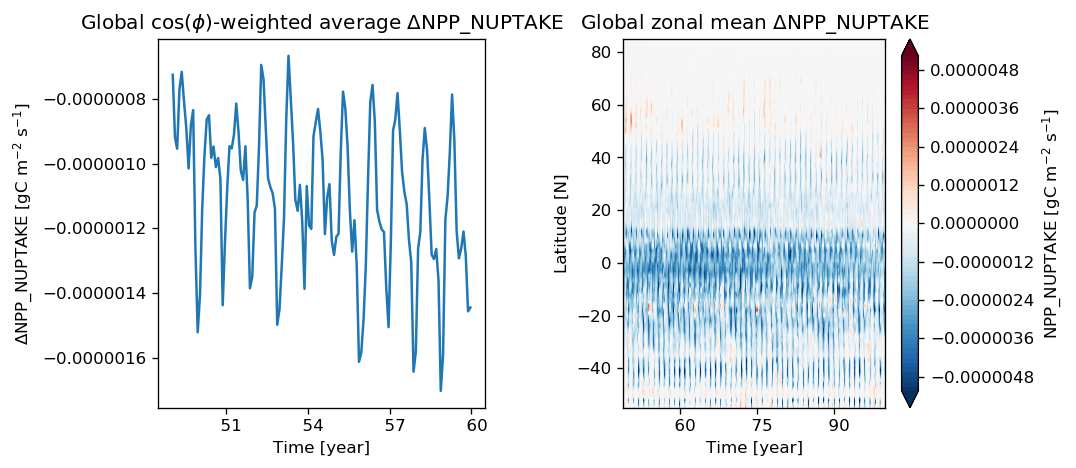

In [9]:
vv = 'npp_nuptake'
gc = 'lnd'

fig,axes = plt.subplots(1,2,figsize=(9,4))
ax = axes.ravel()

(cds.coslat_area_avg(vardict['cst'][gc][vv].sel(time=slice('004901','005912'))) - cds.coslat_area_avg(vardict['ctl'][gc][vv].sel(time=slice('004901','005912')))).plot(ax=ax[0])
ax[0].set_title('Global cos($\phi$)-weighted average $\Delta$NPP_NUPTAKE')
ax[0].set_ylabel('$\Delta$NPP_NUPTAKE [gC m$^{-2}$ s$^{-1}$]')
ax[0].set_xlabel('Time [year]')
# ax[0].set_ylim(-0.7, 0.1)

(vardict['cst'][gc][vv].mean(dim='lon')*wght
 -vardict['ctl'][gc][vv].mean(dim='lon')*wght).transpose().plot.contourf(levels=101,
                                                                         robust=True,
                                                                         ax=ax[1],
                                                                         extend='both',
                                                                         cbar_kwargs={'label': vv.upper()+' [gC m$^{-2}$ s$^{-1}$]'})
ax[1].set_ylim(-55,85)
ax[1].set_ylabel('Latitude [N]')
ax[1].set_xlabel('Time [year]')
ax[1].set_title('Global zonal mean $\Delta$NPP_NUPTAKE')

fig.tight_layout()

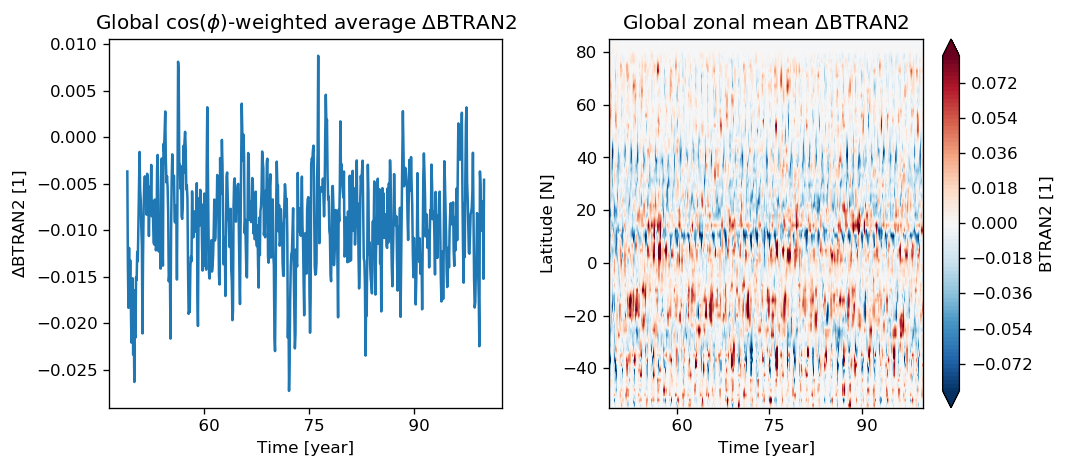

In [10]:
vv = 'btran2'
gc = 'lnd'

fig,axes = plt.subplots(1,2,figsize=(9,4))
ax = axes.ravel()

(cds.coslat_area_avg(vardict['cst'][gc][vv]) - cds.coslat_area_avg(vardict['ctl'][gc][vv])).plot(ax=ax[0])
ax[0].set_title('Global cos($\phi$)-weighted average $\Delta$'+vv.upper())
ax[0].set_ylabel('$\Delta$'+vv.upper()+' [1]')
ax[0].set_xlabel('Time [year]')

(vardict['cst'][gc][vv].mean(dim='lon')*wght
 -vardict['ctl'][gc][vv].mean(dim='lon')*wght).transpose().plot.contourf(levels=101,
                                                                         robust=True,
                                                                         ax=ax[1],
                                                                         extend='both',
                                                                         cbar_kwargs={'label': vv.upper()+' [1]'})
ax[1].set_ylim(-55,85)
ax[1].set_ylabel('Latitude [N]')
ax[1].set_xlabel('Time [year]')
ax[1].set_title('Global zonal mean $\Delta$'+vv.upper())

fig.tight_layout()

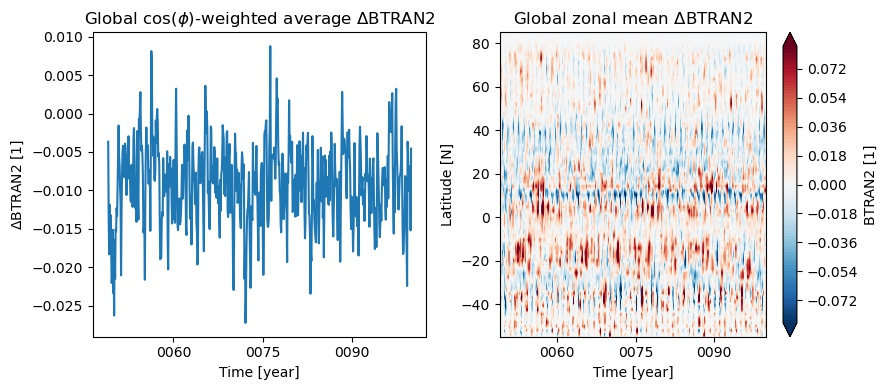

In [14]:
vv = 'btran2'
gc = 'lnd'

fig,axes = plt.subplots(1,2,figsize=(9,4))
ax = axes.ravel()

(cds.coslat_area_avg(vardict['cst'][gc][vv]) - cds.coslat_area_avg(vardict['ctl'][gc][vv])).plot(ax=ax[0])
ax[0].set_title('Global cos($\phi$)-weighted average $\Delta$'+vv.upper())
ax[0].set_ylabel('$\Delta$'+vv.upper()+' [1]')
ax[0].set_xlabel('Time [year]')

(vardict['cst'][gc][vv].mean(dim='lon')*wght
 -vardict['ctl'][gc][vv].mean(dim='lon')*wght).transpose().plot.contourf(levels=101,
                                                                         robust=True,
                                                                         ax=ax[1],
                                                                         extend='both',
                                                                         cbar_kwargs={'label': vv.upper()+' [1]'})
ax[1].set_ylim(-55,85)
ax[1].set_ylabel('Latitude [N]')
ax[1].set_xlabel('Time [year]')
ax[1].set_title('Global zonal mean $\Delta$'+vv.upper())

fig.tight_layout()

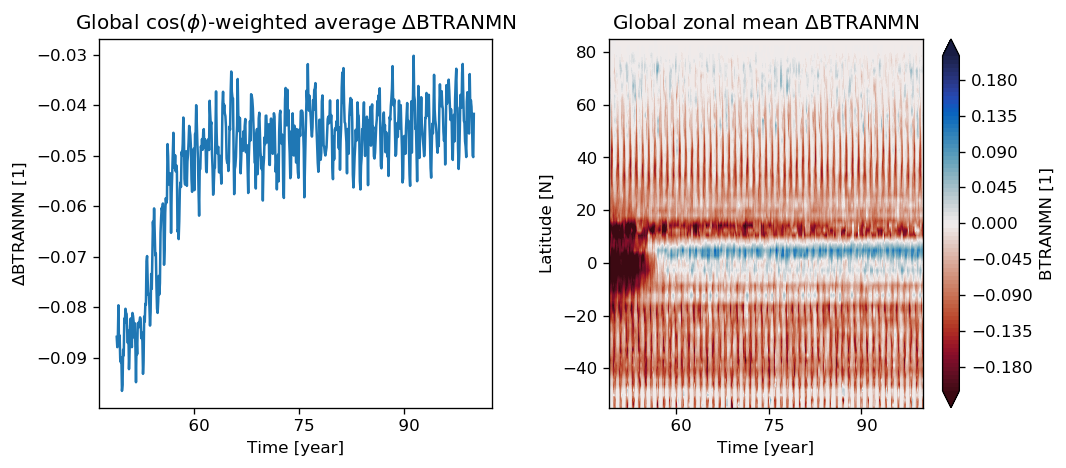

In [29]:
vv = 'btranmn'
gc = 'lnd'

fig,axes = plt.subplots(1,2,figsize=(9,4))
ax = axes.ravel()

(cds.coslat_area_avg(vardict['cst'][gc][vv]) - cds.coslat_area_avg(vardict['ctl'][gc][vv])).plot(ax=ax[0])
ax[0].set_title('Global cos($\phi$)-weighted average $\Delta$'+vv.upper())
ax[0].set_ylabel('$\Delta$'+vv.upper()+' [1]')
ax[0].set_xlabel('Time [year]')

(vardict['cst'][gc][vv].mean(dim='lon')*wght
 -vardict['ctl'][gc][vv].mean(dim='lon')*wght).transpose().plot.contourf(levels=101,
                                                                         cmap=cmo.balance_r,
                                                                         robust=True,
                                                                         ax=ax[1],
                                                                         extend='both',
                                                                         cbar_kwargs={'label': vv.upper()+' [1]'})
ax[1].set_ylim(-55,85)
ax[1].set_ylabel('Latitude [N]')
ax[1].set_xlabel('Time [year]')
ax[1].set_title('Global zonal mean $\Delta$'+vv.upper())

fig.tight_layout()

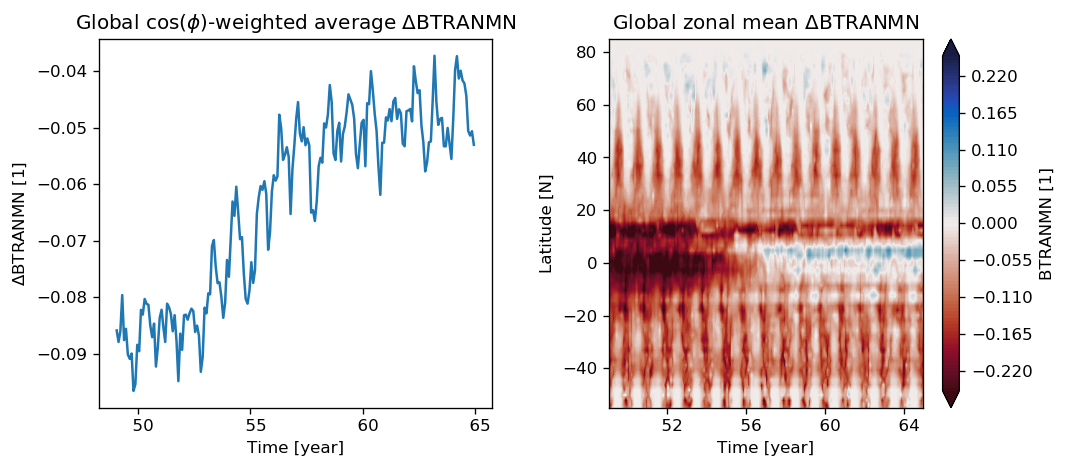

In [30]:
vv = 'btranmn'
gc = 'lnd'
ts = slice('004901','006412')

fig,axes = plt.subplots(1,2,figsize=(9,4))
ax = axes.ravel()

(cds.coslat_area_avg(vardict['cst'][gc][vv].sel(time=ts)) - cds.coslat_area_avg(vardict['ctl'][gc][vv].sel(time=ts))).plot(ax=ax[0])
ax[0].set_title('Global cos($\phi$)-weighted average $\Delta$'+vv.upper())
ax[0].set_ylabel('$\Delta$'+vv.upper()+' [1]')
ax[0].set_xlabel('Time [year]')

(vardict['cst'][gc][vv].mean(dim='lon').sel(time=ts)*wght
 -vardict['ctl'][gc][vv].mean(dim='lon').sel(time=ts)*wght).transpose().plot.contourf(levels=101,
                                                                                      cmap=cmo.balance_r,
                                                                         robust=True,
                                                                         ax=ax[1],
                                                                         extend='both',
                                                                         cbar_kwargs={'label': vv.upper()+' [1]'})
ax[1].set_ylim(-55,85)
ax[1].set_ylabel('Latitude [N]')
ax[1].set_xlabel('Time [year]')
ax[1].set_title('Global zonal mean $\Delta$'+vv.upper())

fig.tight_layout()

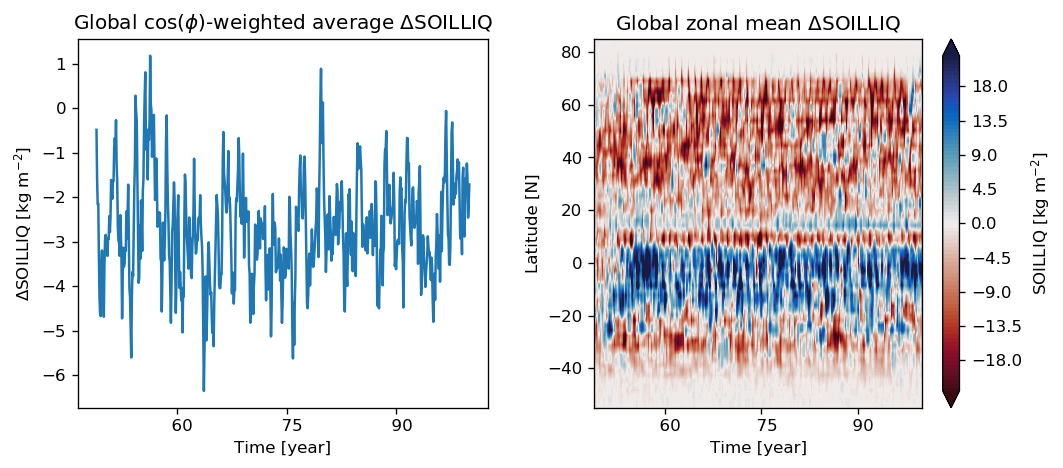

In [13]:
vv = 'soilliq'
gc = 'lnd'

fig,axes = plt.subplots(1,2,figsize=(9,4))
ax = axes.ravel()

(cds.coslat_area_avg(vardict['cst'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi')) - cds.coslat_area_avg(vardict['ctl'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi'))).plot(ax=ax[0])
ax[0].set_title('Global cos($\phi$)-weighted average $\Delta$'+vv.upper())
ax[0].set_ylabel('$\Delta$'+vv.upper()+' [kg m$^{-2}$]')
ax[0].set_xlabel('Time [year]')

(vardict['cst'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi').mean(dim='lon')*wght
 -vardict['ctl'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi').mean(dim='lon')*wght).transpose().plot.contourf(levels=101, cmap=cmo.balance_r,
                                                                         robust=True,
                                                                         ax=ax[1],
                                                                         extend='both',
                                                                         cbar_kwargs={'label': vv.upper()+' [kg m$^{-2}$]'})
ax[1].set_ylim(-55,85)
ax[1].set_ylabel('Latitude [N]')
ax[1].set_xlabel('Time [year]')
ax[1].set_title('Global zonal mean $\Delta$'+vv.upper())

fig.tight_layout()

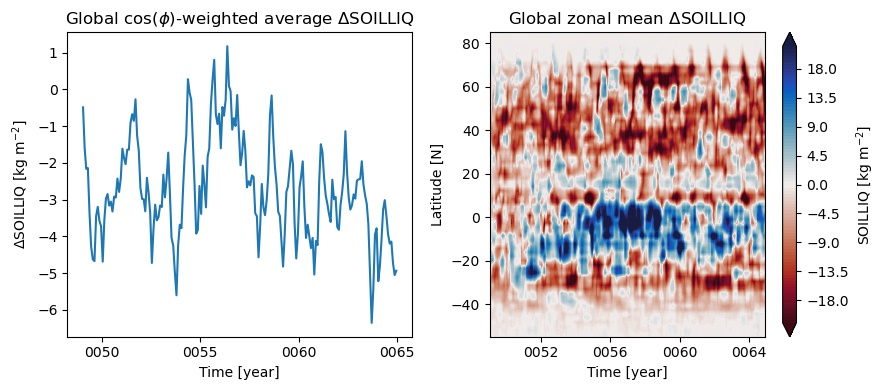

In [33]:
vv = 'soilliq'
gc = 'lnd'
ts = slice('004901','006412')

fig,axes = plt.subplots(1,2,figsize=(9,4))
ax = axes.ravel()

(cds.coslat_area_avg(vardict['cst'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi').sel(time=ts)) - cds.coslat_area_avg(vardict['ctl'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi').sel(time=ts))).plot(ax=ax[0])
ax[0].set_title('Global cos($\phi$)-weighted average $\Delta$'+vv.upper())
ax[0].set_ylabel('$\Delta$'+vv.upper()+' [kg m$^{-2}$]')
ax[0].set_xlabel('Time [year]')

(vardict['cst'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi').sel(time=ts).mean(dim='lon')*wght
 -vardict['ctl'][gc][vv].sel(levsoi=slice(0,3)).sum(dim='levsoi').sel(time=ts).mean(dim='lon')*wght).transpose().plot.contourf(levels=101, cmap=cmo.balance_r,
                                                                         robust=True,
                                                                         ax=ax[1],
                                                                         extend='both',
                                                                         cbar_kwargs={'label': vv.upper()+' [kg m$^{-2}$]'})
ax[1].set_ylim(-55,85)
ax[1].set_ylabel('Latitude [N]')
ax[1].set_xlabel('Time [year]')
ax[1].set_title('Global zonal mean $\Delta$'+vv.upper())

fig.tight_layout()